## Problem Statement
- Understand the influence of the variables on the students' performance
- Train a model that can predict the scores of the students depending on those variables

## Data Collection
Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [6]:
## Built-in
import os

In [8]:
# Basic
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Reading

In [10]:
data = pd.read_csv("../data/raw/data.csv")

In [12]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Univariate Analysis
- Data Types
- Missing & Duplicate Values
- Unique Values
- Central Tendency and Outliers
- Distributions
## Data Types

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
rows, columns = data.shape

In [18]:
categorical = [column for column in data if data[column].dtype == 'O']
numerical = [column for column in data if data[column].dtype != 'O']

In [20]:
print(f'Numerical: {len(numerical)}\nCategorical: {len(categorical)}')

Numerical: 3
Categorical: 5


Conclusions:
- There are 8 features and 1000 values for each feature
- All of the features have the correct data types
- There are 3 numerical and 5 categorical features

## Missing & Duplicate Values 

In [22]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [24]:
data.duplicated().sum()

0

Conclusion: There are no missing and/or duplicate values

## Unique Values

In [26]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Mean, Median, Mode and Outliers

In [28]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<Axes: >

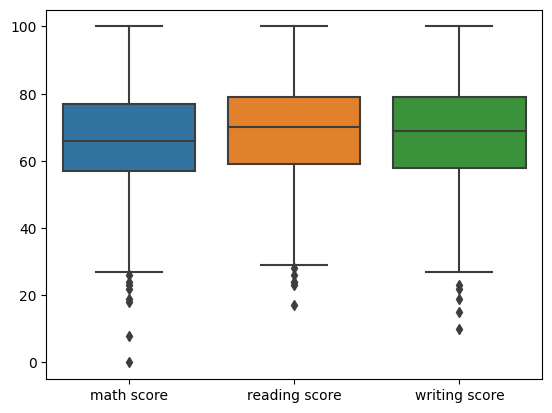

In [30]:
sns.boxplot(data)

Conclusions:
- Each features have some outliers
- Features have similar Mean and Standard Deviation

## Distributions

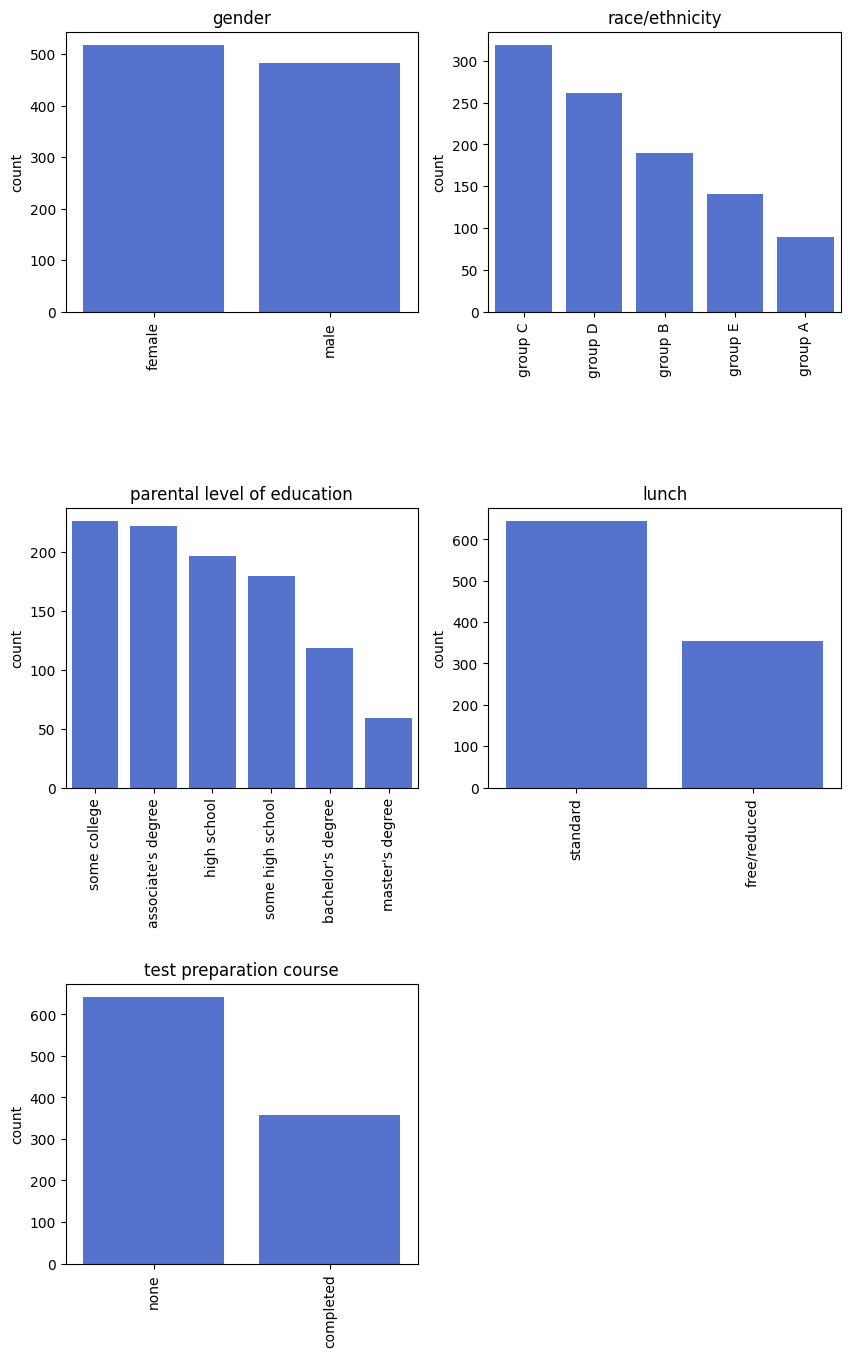

In [148]:
t_cols = 2
t_rows = round(len(categorical)/t_cols) + 1

fig = plt.figure(figsize=(10, 16))
for idx, feature in enumerate(categorical):
    ax = fig.add_subplot(t_rows, t_cols, idx+1, title=feature)
    sns.countplot(
        x=feature,  
        data=data, 
        order=data[feature].value_counts().index,
        color='royalblue',
        ax=ax,
    )
    plt.xlabel('')
    plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7)

Conclusions:
- There are slightly more female than male students
- Group C contains the highest amount of people
- Most parent went to some college or have associate's degree
- Most students eat standard lunch
- Most student didn't finish their test preparation course

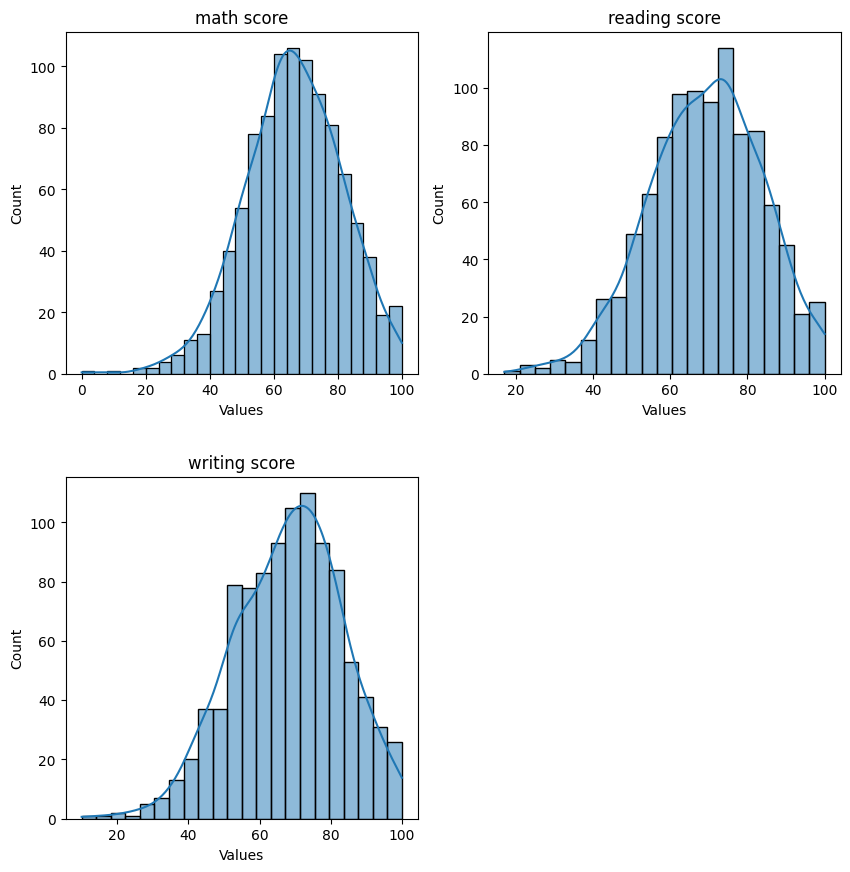

In [33]:
t_cols = 2
t_rows = round(len(numerical)/t_cols) + 1

fig = plt.figure(figsize=(10, 16))
for idx, feature in enumerate(numerical):
    ax = fig.add_subplot(t_rows, t_cols, idx+1, title=feature)
    plt.xlabel('Values')
    sns.histplot(
        data=data[feature], 
        kde=True, 
        ax=ax
    )
plt.subplots_adjust(hspace=0.3)

Conclusion:
- All of the features are normally distributed

# Bivariate/Multivariate Analysis
- Numerical-Numerical Relationships and Correlations
- Numerical-Categorical Relationships
- Categorical-Categorical Relationships

## Numerical-Numerical

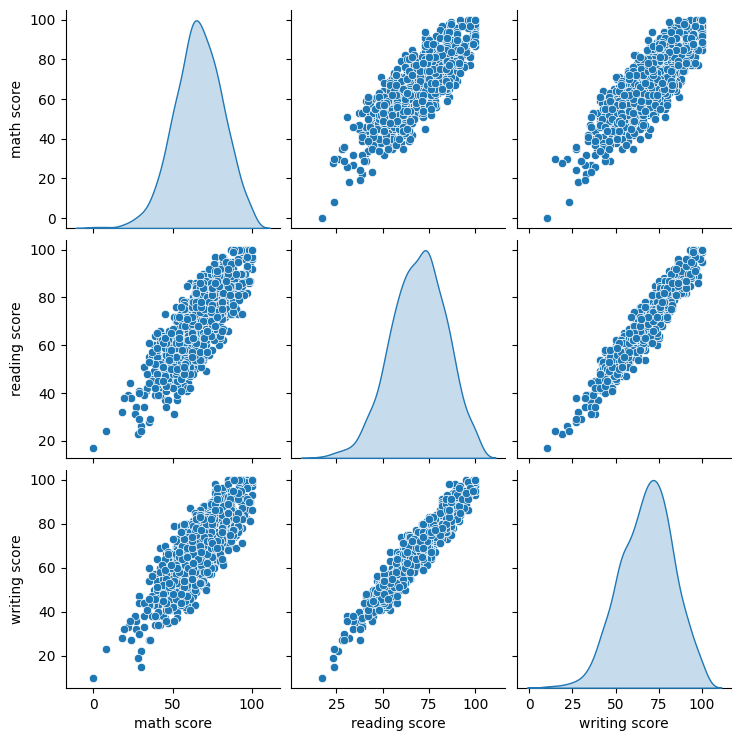

In [34]:
sns.pairplot(
    data, 
    diag_kind='kde'
)

Conclusion:
- All of the numerical features seem to have linear relationship and a positive correlation

<Axes: title={'center': 'Correlations'}>

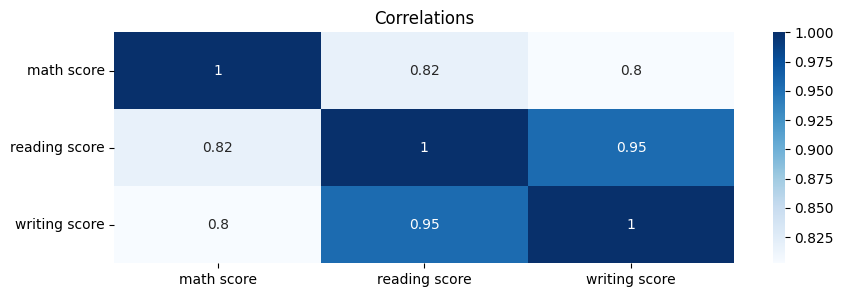

In [37]:
plt.figure(figsize=(10, len(numerical)))
plt.title('Correlations')
sns.heatmap(data[numerical].corr(), annot=True, cmap='Blues')

Conclusion:
- Hence proven that all the features have high positive correlation

Note:
- All of the score features can be dependent variable
- Let's consider that we want to predict the score of only one subject
- Then, unless other score are already calculated before the chosen subject, they cannot be used as a feature for the chosen subject

## Numerical-Categorical

In [149]:
depend = 'math score'

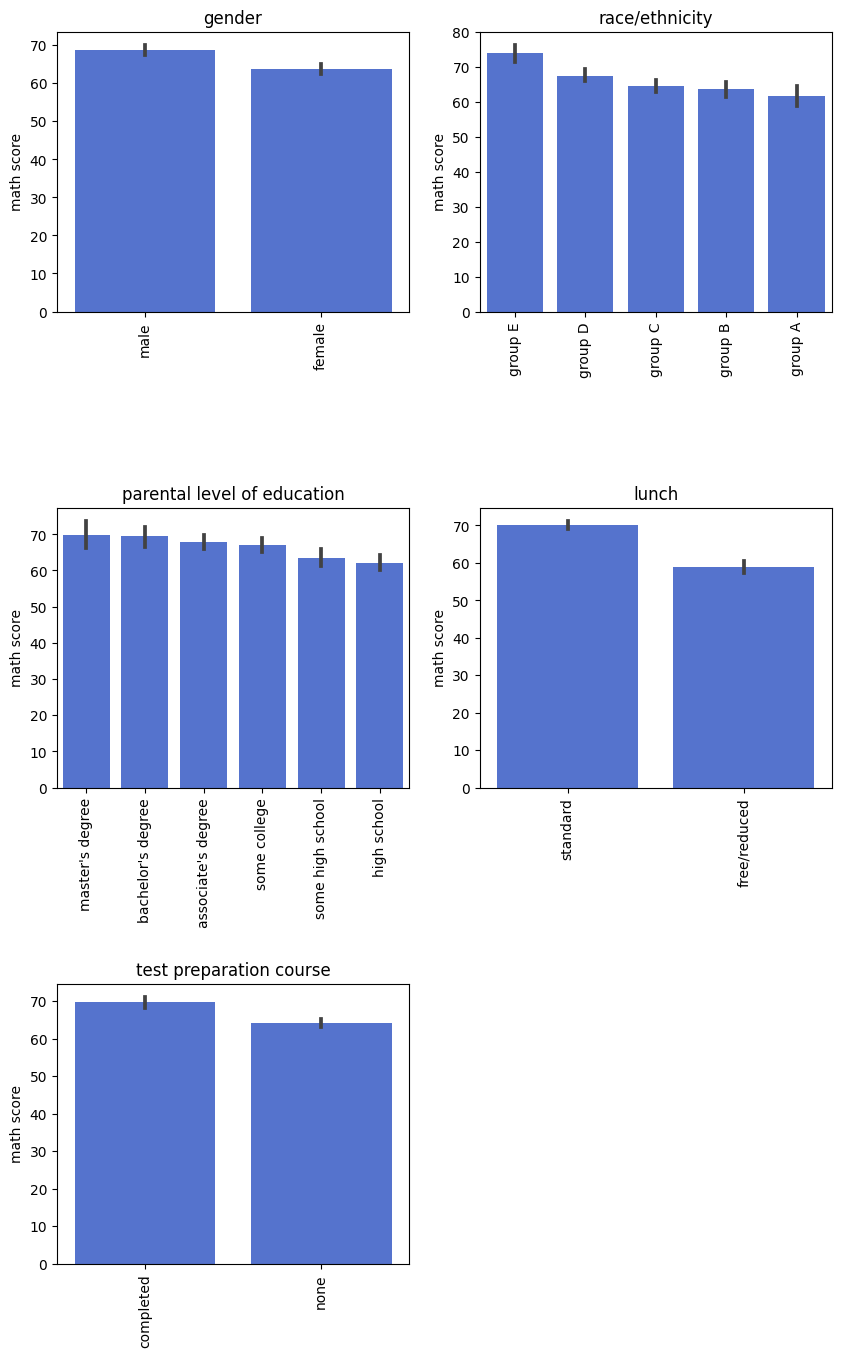

In [150]:
t_cols = 2
t_rows = round(len(categorical)/t_cols) + 1

fig = plt.figure(figsize=(10, 16))
for idx, feature in enumerate(categorical):
    ax = fig.add_subplot(t_rows, t_cols, idx+1, title=feature)
    sns.barplot(
        x=feature, 
        y=depend,  
        data=data, 
        order=data.groupby(feature)[depend].mean().sort_values(ascending=False).index,
        estimator=np.mean,
        color='royalblue',
        ax=ax,
    )
    plt.xlabel('')
    plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7)

Conclusions:
- Males did more well than females
- Group E student did more well than others
- Parent's education had only a slight effect on the score
- Students who ate standard lunch did more well
- Students who completed their test preparation course did more well

## Categorical-Categorical
- Lets just check one filter since we do not have any particular question that need to be answered

In [156]:
hue = 'gender'

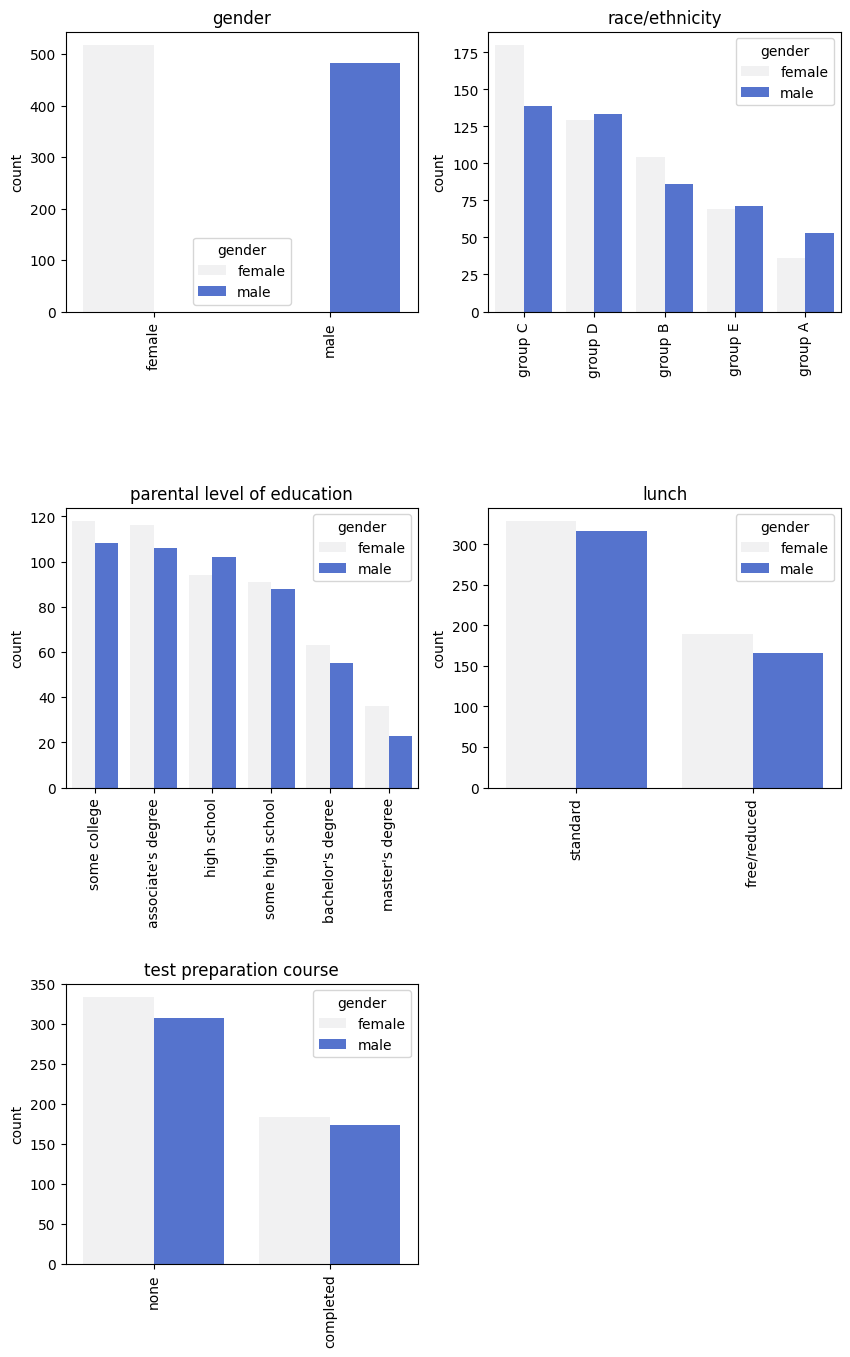

In [157]:
t_cols = 2
t_rows = round(len(categorical)/t_cols) + 1

fig = plt.figure(figsize=(10, 16))
for idx, feature in enumerate(categorical):
    ax = fig.add_subplot(t_rows, t_cols, idx+1, title=feature)
    sns.countplot(
        x=feature,  
        data=data, 
        order=data[feature].value_counts().index,
        color='royalblue',
        hue=hue,
        ax=ax,
    )
    plt.xlabel('')
    plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7)

Conclusion:
- Females are slightly more in almost everything